In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import pickle 
import matplotlib
from scipy import interpolate

# read datasets

In [2]:
# https://www.epa.gov/east-palestine-oh-train-derailment/air-sampling-data#airsamplingcollection
air_df = pd.read_csv('/content/Lab_Results_Air.csv') 
# https://www.epa.gov/east-palestine-oh-train-derailment/soil-and-sediment-sampling-data
soil_df = pd.read_csv('/content/Lab_Results_Soil_Sediment.csv')
# https://www.epa.gov/east-palestine-oh-train-derailment/water-sampling-data
water_df = pd.read_csv('/content/Lab_Results_Water.csv')

# Identify Dangerous Chemicals in East Palestine Ohio Train Derailment Incident

In [3]:
# A dictionary of the 
# Dangerous Chemicals
# I have gathered from articles about the Ohio Trail Derailment Incident
# the sources are mentioned in front of each chemical
# (name, CAS_NO)
d_chemicals = [('Vinyl Chloride', '75-01-4'), # https://jglobalbiosecurity.com/articles/10.31646/gbio.207 # https://www.nbcnews.com/science/science-news/ohio-derailment-chemicals-spilled-impact-residents-rcna71561
               ('polyethylene', '9002-88-4'), # https://jglobalbiosecurity.com/articles/10.31646/gbio.207
               ('n-Butyl acrylate', '141-32-2'), # https://jglobalbiosecurity.com/articles/10.31646/gbio.207 # https://www.nbcnews.com/science/science-news/ohio-derailment-chemicals-spilled-impact-residents-rcna71561
               ('ethylene glycol', '107-21-1'), # https://jglobalbiosecurity.com/articles/10.31646/gbio.207 #https://www.nbcnews.com/science/science-news/ohio-derailment-chemicals-spilled-impact-residents-rcna71561
               ('2-Ethylhexyl acrylate', '103-11-7'), # https://www.cbsnews.com/news/timeline-east-palestine-ohio-train-derailment-chemicals-evacuations/
               ('Acrolein', '107-02-8'), # https://www.cnn.com/2023/02/28/health/train-chemical-analysis-east-palestine/index.html
               ('Benzene', '71-43-2'), # https://jglobalbiosecurity.com/articles/10.31646/gbio.207
               ('hydrogen chloride', '7647-01-0'), # https://www.nbcnews.com/science/science-news/ohio-derailment-chemicals-spilled-impact-residents-rcna71561
               ('Phosgene', '75-44-5'), # https://jglobalbiosecurity.com/articles/10.31646/gbio.207
               ('Isobutylene', '115-11-7'), # https://www.nbcnews.com/science/science-news/ohio-derailment-chemicals-spilled-impact-residents-rcna71561 # https://www.cbsnews.com/news/timeline-east-palestine-ohio-train-derailment-chemicals-evacuations/
               ('Propylene', '115-07-1'), # https://www.npr.org/2023/03/03/1160481769/east-palestine-derailment-toxic-waste-cleanup
               ('Diethylene', '111-46-6'), # https://www.npr.org/2023/03/03/1160481769/east-palestine-derailment-toxic-waste-cleanup
               ('Semolina', '7439-95-4'), # https://www.npr.org/2023/03/03/1160481769/east-palestine-derailment-toxic-waste-cleanup
               ('Polyvinyl', '9002-89-5') # https://www.npr.org/2023/03/03/1160481769/east-palestine-derailment-toxic-waste-cleanup
               ] 

## Some information about the chemicals above:


*   On 3 February, 2023, a 149-car freight train derailed outside the town of East Palestine in the U.S. state of Ohio while en route to Conway, Pennsylvania (1). Private rail operator Norfolk Southern told media outlets that 20 of the rail cars were carrying numerous volatile organic compounds (VOCs) at the time, including vinyl chloride, polyethylene, benzene, butyl acrylates and ethylene glycol (2)
* [Five toxic chemicals have been identified around the derailment site:](https://https://www.nbcnews.com/science/science-news/ohio-derailment-chemicals-spilled-impact-residents-rcna71561)
* Vinyl chloride: A known carcinogen, vinyl chloride is a colorless and flammable gas that is used to produce polyvinyl chloride (PVC) plastic for packaging materials and a range of electronic, medical and construction products. Symptoms of exposure include drowsiness, disorientation, numbness and tingling of the extremities and nausea, according to the Centers for Disease Control and Prevention. The chemical can also irritate the eyes and skin.
* Butyl acrylate: A colorless liquid with a strong, fruity odor that is often used to produce various plastics, polymers, coatings and resins. Exposure to the chemical can cause irritation to the eyes and skin, rashes and breathing difficulties, according to the CDC.
* Isobutylene: A colorless gas that is used to produce plastics, packaging materials and resins. Exposure can cause symptoms such as dizziness and headache, but a cargo manifest provided to the Environmental Protection Agency indicates that Norfolk Southern, the company that operated the train, saw “no signs of breach” with the car carrying this chemical.
* Ethylene glycol and ethylhexyl acrylate: Ethylhexyl acrylate is a colorless liquid that is commonly used to produce plastics and polymers. Ethylene glycol is a synthetic compound used in inks, paint, hydraulic brake fluids and antifreeze. Both can both cause irritation of the skin and eyes, as well as sore throat and nausea with exposure at high concentrations.
* [Of more immediate concern are the by-products that can result from the burning of vinyl chloride, including carbon monoxide, carbon dioxide and phosgene ](https://https://jglobalbiosecurity.com/articles/10.31646/gbio.207) The potential for phosgene to damage human health, even when only present in the air at very low levels, has prompted distress amongst members of the East Palestine community.
* [The highest levels found in East Palestine were of a chemical called acrolein, the analysis says. ](https://https://www.cnn.com/2023/02/28/health/train-chemical-analysis-east-palestine/index.html) Acrolein is used to control plants, algae, rodents and microorganisms. It is a clear liquid at room temperature, and it is toxic. It can cause inflammation and irritation of the skin, respiratory tract and mucous membranes, according to the US Centers for Disease Control and Prevention.



In [4]:
# Save the dictionary to a pickle file
with open('d_chemicals.pickle', 'wb') as f:
    pickle.dump(d_chemicals, f)

In [5]:
# Read the dictionary from the file
with open('d_chemicals.pickle', 'rb') as f:
    d_chemicals_from_file = pickle.load(f)

# Print the dictionary read from the file
print(d_chemicals_from_file)

[('Vinyl Chloride', '75-01-4'), ('polyethylene', '9002-88-4'), ('n-Butyl acrylate', '141-32-2'), ('ethylene glycol', '107-21-1'), ('2-Ethylhexyl acrylate', '103-11-7'), ('Acrolein', '107-02-8'), ('Benzene', '71-43-2'), ('hydrogen chloride', '7647-01-0'), ('Phosgene', '75-44-5'), ('Isobutylene', '115-11-7'), ('Propylene', '115-07-1'), ('Diethylene', '111-46-6'), ('Semolina', '7439-95-4'), ('Polyvinyl', '9002-89-5')]


In [4]:
def clean_dataframe(df):
    """
    Cleans the given DataFrame `df` by performing the following operations:
    
    1. Replaces "<" values in the 'Result_Final_Txt' column with the reporting limit.
    2. Converts the 'SampleDate_txt' and 'SampleTime' columns to datetime format and
       creates a new 'datetime' column by combining them.
       
    Args:
    -----
    df : pandas.DataFrame
        The DataFrame to be cleaned.
    
    Returns:
    --------
    pandas.DataFrame
        The cleaned DataFrame.
    """
    df['Result_Final_Txt'] = df.apply(lambda row: float(row['Result_Final_Txt'][1:]) if '<' in str(row['Result_Final_Txt']) else float(row['Result_Final_Txt']), axis=1)
    df['datetime'] = pd.to_datetime(df['SampleDate_txt'] + ' ' + df['SampleTime'])

    return df

In [5]:
air_df = clean_dataframe(air_df)
soil_df = clean_dataframe(soil_df)
water_df = clean_dataframe(water_df)

In [6]:
def count_filtered_records(df, CAS_NO, measurement, threshold):
  """
  Counts the number of unique records in the given DataFrame `df` that satisfy the
  specified filtering criteria:
  
  - 'Result_Final_Txt' column >= `threshold`
  - 'CAS_NO' column == `CAS_NO`
  - 'Result_Units' column == `measurement`
  
  The count is based on the unique combination of 'datetime' and 'Location' columns.
  
  Args:
  -----
  df : pandas.DataFrame
      The DataFrame to be filtered and counted.
  CAS_NO : str
      The CAS number of the chemical of interest.
  measurement : str
      The unit of measurement of interest.
  threshold : float
      The threshold value for the 'Result_Final_Txt' column.
  
  Returns:
  --------
  None
      The function prints the count of filtered records to the console.
  """
  filtered_df = df.loc[(df['Result_Final_Txt'] >= threshold) & (df['CAS_NO'] == CAS_NO) & (df['Result_Units'] == measurement), ['datetime', 'Location']]
  count = filtered_df.drop_duplicates().nunique()[0]
  print(count)

count_filtered_records(air_df,  '75-01-4', 'ug/m3', .2)

26


In [7]:
def plot_chemical(df, cas_no, chem_name, measurement, threshold, annot=False, line=False): 
    """
    Creates a bubble chart and time series plot for a chemical of interest, based on the
    given DataFrame `df` and filtering criteria. The plot shows the concentration of the
    chemical over time, with points colored by location and sized by concentration.
    
    Args:
    -----
    df : pandas.DataFrame
        The DataFrame containing the chemical data.
    cas_no : str
        The CAS number of the chemical of interest.
    chem_name : str
        The name of the chemical of interest.
    measurement : str
        The unit of measurement of interest.
    threshold : float
        The threshold value for the concentration of interest.
    annot : bool, optional
        Whether to add annotations for points above the threshold (default False).
    line : bool, optional
        Whether to interpolate lines for groups with at least 4 points above threshold (default False).
    
    Returns:
    --------
    None
        The function displays the plot using matplotlib.
    """ 

    # Filter the DataFrame by the chemical of interest and measurement unit
    chem_df = df[(df['CAS_NO'] == cas_no) & (df['Result_Units'] == measurement)]

    # Group the DataFrame by datetime and location, and compute the sum of concentrations
    grouped_df = chem_df.groupby(['datetime', 'Location'])[ 'Result_Final_Txt'].sum().reset_index()

    # Set the index of the grouped DataFrame to datetime for easier plotting
    indexed_df = grouped_df.set_index('datetime')

    fig, ax = plt.subplots(figsize=(15, 8))
    # Loop over groups of the DataFrame, grouped by location
    for name, group in grouped_df.groupby('Location'):
        x = group.index
        y = group['Result_Final_Txt']
        mask = y >= threshold
        label = None
        if any(mask):
            label = name
            # If line is True and there are at least 4 points above threshold,
            # interpolate a line for the group using spline interpolation
            if line and sum(mask) > 3:
                tck, u = interpolate.splprep([x[mask], y[mask]], s=0)
                u_new = np.linspace(u.min(), u.max(), 1000)
                x_new, y_new = interpolate.splev(u_new, tck)
                plt.plot(x_new, y_new, alpha=1, linewidth=1)
                # Add a scatter plot for the points above threshold, with label
                plt.scatter(x[mask], y[mask], marker='o', s=150, alpha=1, label=label)
            else:
                # Add a scatter plot for the points above threshold, with label
                plt.scatter(x[mask], y[mask], marker='o', s=150, alpha=1, label=label)
        else:
            # Add a scatter plot for the points below threshold, with lower alpha and black color
            plt.scatter(x, y, alpha=0.3, marker='o', color='black', s=50)

        # Add annotations for points above threshold
        if annot:
          for i, val in group[mask].iterrows():
              ax.annotate(val['Location'], xy=(i, val['Result_Final_Txt']), xytext=(i+0.2, val['Result_Final_Txt']+0.2))

    # add the threshold line
    ax.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

    plt.title('Bubble Chart and Time Series of Chemical: '+ chem_name +' CAS_NO: ' + cas_no )
    plt.xlabel('Date')
    plt.ylabel('Concentration in: ' + measurement)

    # Set the x-axis tick locations and labels
    ax.set_xticks(range(len(grouped_df['datetime'].unique())))
    ax.set_xticklabels(grouped_df['datetime'].dt.strftime('%Y-%m-%d'), rotation=55, ha='right')

    plt.legend(loc='upper left', fontsize="medium", bbox_to_anchor=(1, 1))
    plt.show()

In [58]:
def save_above_threshold(df, cas_no, chem_name, measurement, threshold, sample_type):
  """
  Filters a pandas DataFrame for records where the Result_Final_Txt value is above a threshold, and the CAS_NO, 
  Result_Units, and Matrix columns match specified values. The resulting DataFrame is saved to a CSV file with a 
  filename that includes the sample_type, cas_no, and chem_name.
  
  Args:
  - df: pandas DataFrame containing chemical measurement data
  - cas_no: string representing the CAS number of the chemical
  - chem_name: string representing the name of the chemical
  - measurement: string representing the units of measurement for the chemical
  - threshold: float representing the threshold value for the chemical measurement
  - sample_type: string representing the type of sample for the chemical including Air, Water, Soil, Sediment
  
  Returns:
  - None
  """
  above_threshold_df = df[(df['CAS_NO'] == cas_no) & (df['Result_Final_Txt'] >= threshold) & (df['Result_Units'] == measurement) & (df['Matrix'] == sample_type)]
  # Save the dataframe to a CSV file ONLY IF it's not empty
  if not above_threshold_df.empty:
      above_threshold_df.to_csv(f'{sample_type}_{cas_no}_{chem_name}_above_threshold.csv', index=False)

# Air Plots for Danagerous Chemicals

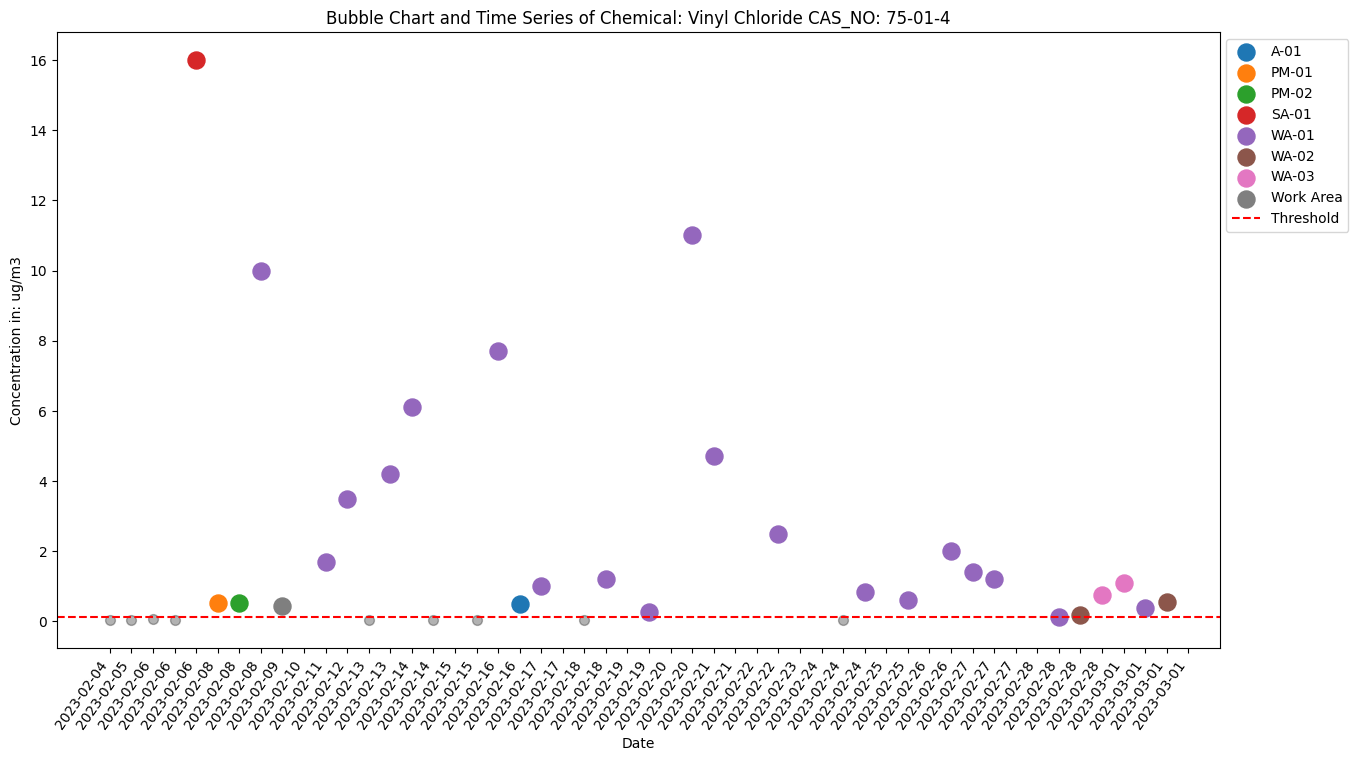

In [8]:
# threshold: https://www.epa.gov/sites/default/files/2020-05/documents/vinyl_chloride_march_26_2020.pdf
plot_chemical(air_df, '75-01-4', 'Vinyl Chloride', 'ug/m3', .11)

In [59]:
# save dataframe
save_above_threshold(air_df, '75-01-4', 'Vinyl Chloride', 'ug/m3', .11, 'Air')

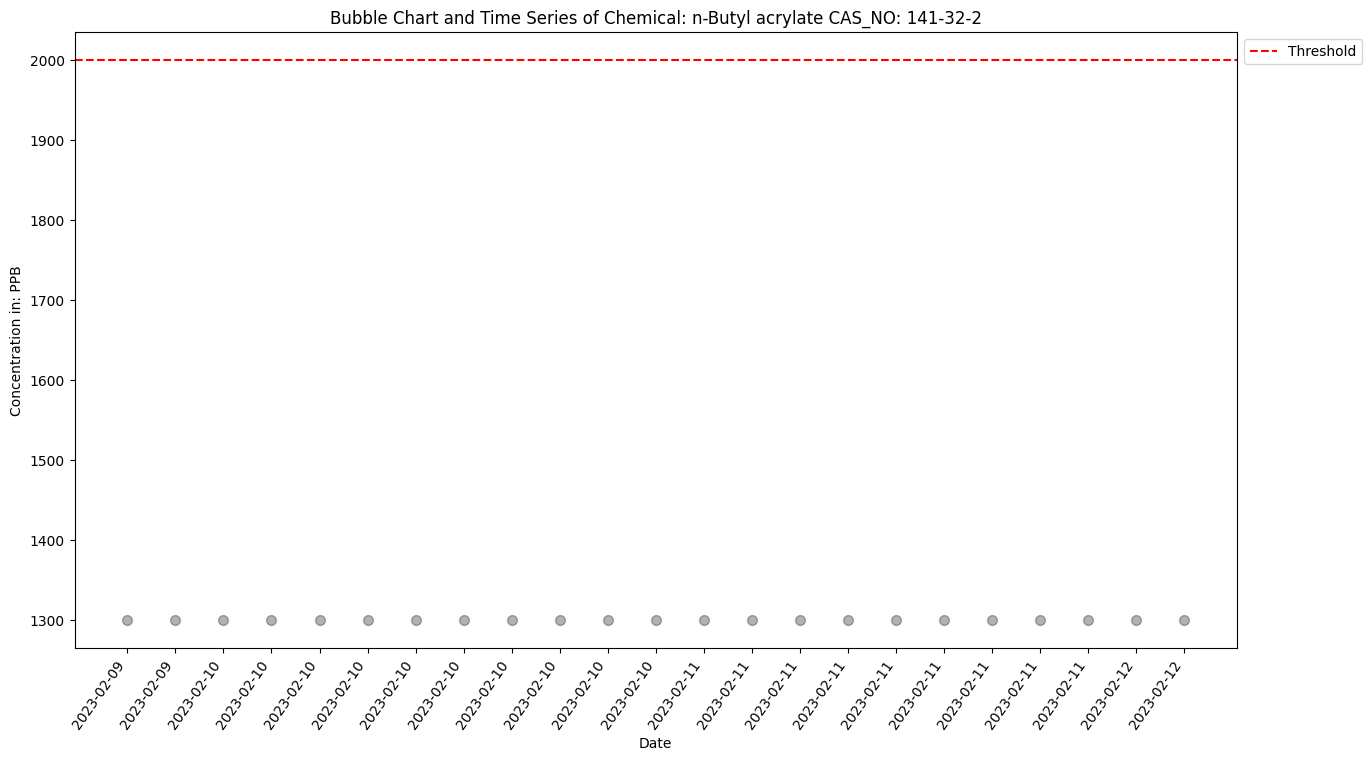

In [39]:
# threshold: https://www.nj.gov/health/eoh/rtkweb/documents/fs/0278.pdf
plot_chemical(air_df, '141-32-2', 'n-Butyl acrylate', 'PPB', 2000)

The American Conference of Governmental Industrial Hygienists (ACGIH) has assigned butyl acrylate a threshold limit value (TLV) of 10 ppm (52 mg/m³) as a TWA for a normal 8-hr workday and a 40-hr workweek [ACGIH 1991b]

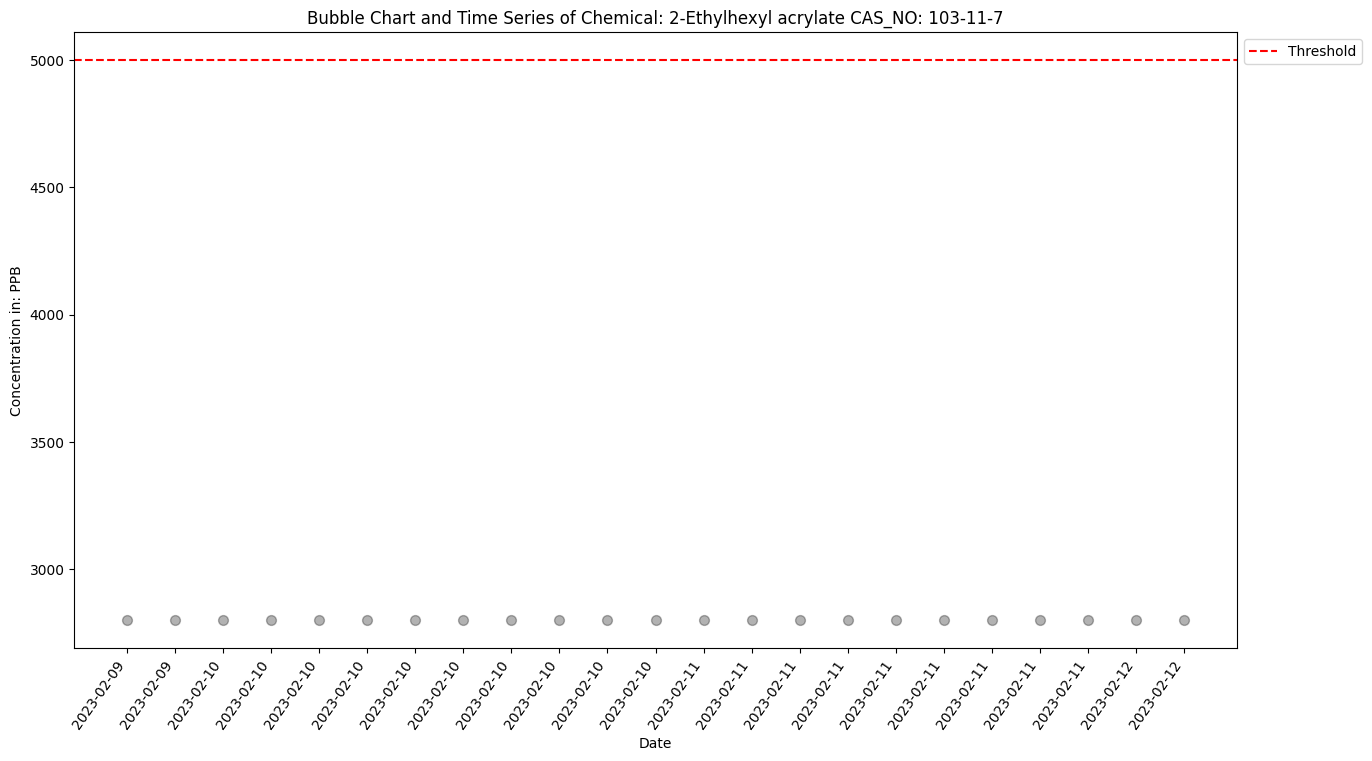

In [40]:
# threshold: https://www.google.com/search?q=2-Ethylhexyl+acrylate+safety+threshold+in+PPB&rlz=1C5CHFA_enIR853US855&sxsrf=APwXEdcG-sIn5hNKEL43l6mjk9NTfO-_Ew%3A1682614272605&ei=AKhKZNixJKeqptQPq5mewAQ&ved=0ahUKEwjYsYzQwsr-AhUnlYkEHauMB0gQ4dUDCBA&uact=5&oq=2-Ethylhexyl+acrylate+safety+threshold+in+PPB&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCAAQogQyBQgAEKIEMgUIABCiBEoECEEYAFAAWABgjR5oAHABeACAAXiIAXiSAQMwLjGYAQCgAQKgAQHAAQE&sclient=gws-wiz-serp#:~:text=Search%20Results-,2%2DEthylhexyl%20Acrylate,https%3A//www.parchem.com%20%E2%80%BA%20Attachment%20%E2%80%BA%202%2DEt...,-Acute%20aquatic%20toxicity
plot_chemical(air_df, '103-11-7', '2-Ethylhexyl acrylate', 'PPB', 5000)

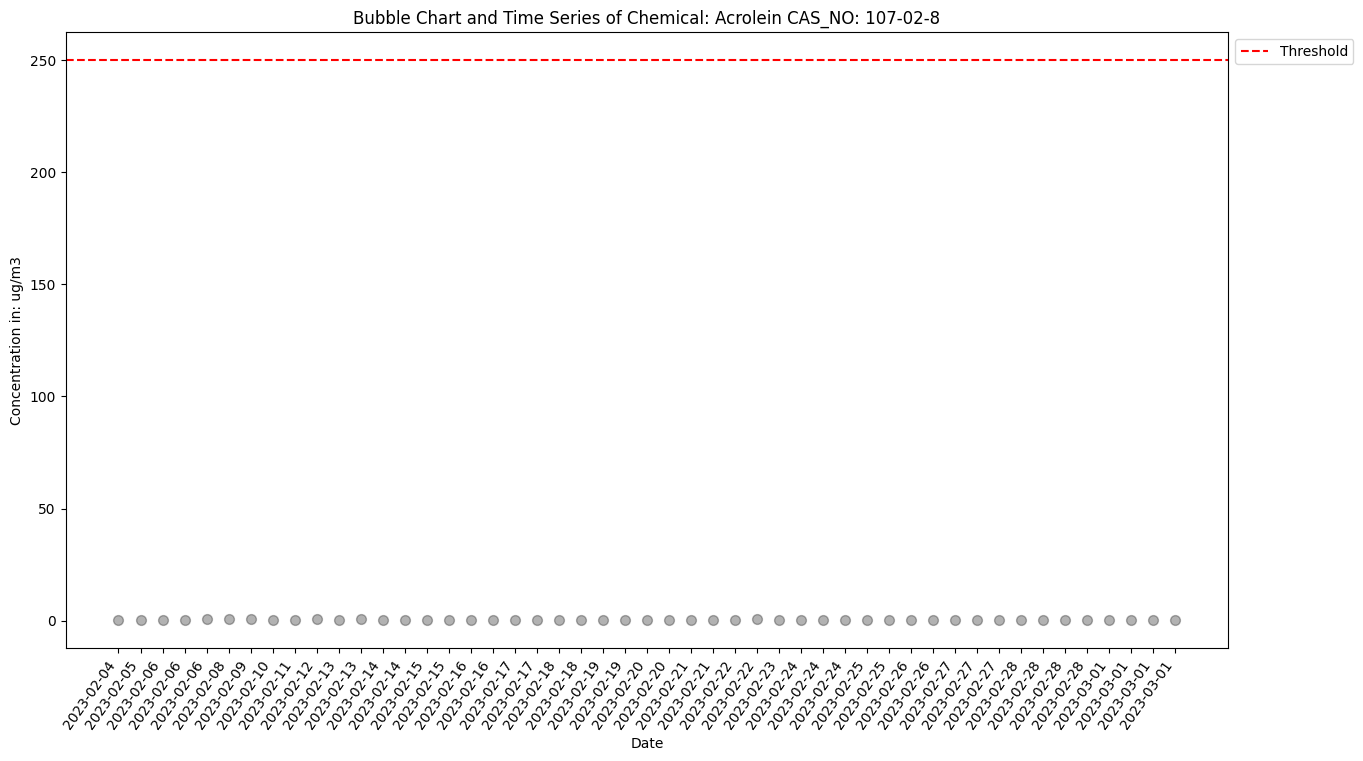

In [20]:
# threshold: https://www.sigmaaldrich.com/BE/en/sds/aldrich/110221
plot_chemical(air_df, '107-02-8', 'Acrolein', 'ug/m3', 250)

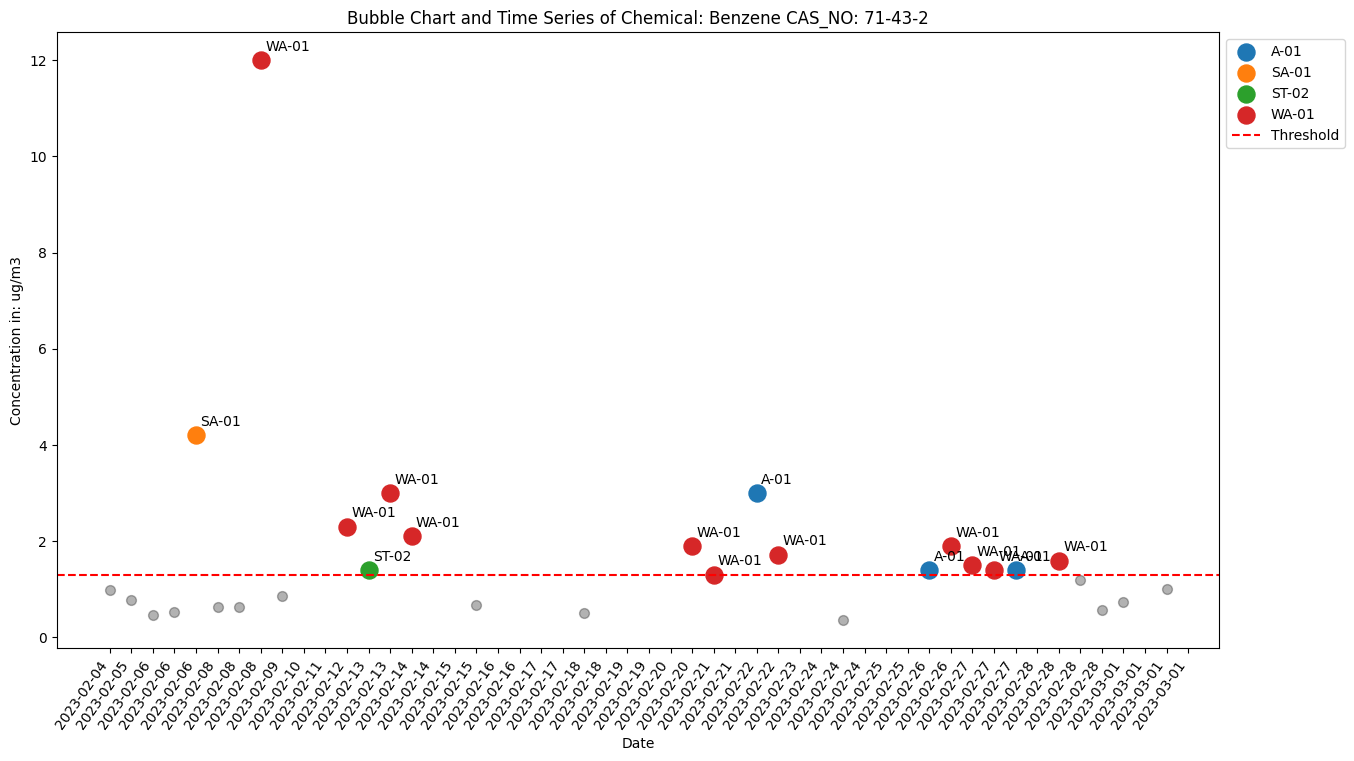

In [9]:
# threshold: https://www.epa.gov/sites/default/files/2016-09/documents/benzene.pdf
plot_chemical(air_df, '71-43-2', 'Benzene', 'ug/m3', 1.3, annot=True)

In [60]:
# save dataframe
save_above_threshold(air_df, '71-43-2', 'Benzene', 'ug/m3', 1.3, 'Air')

# Soil Plots for Danagerous Chemicals

Inhalation Reference Concentration (RfC): 0.04 mg/kg/day
Oral Reference Dose (RfD): 0.1 mg/kg/day

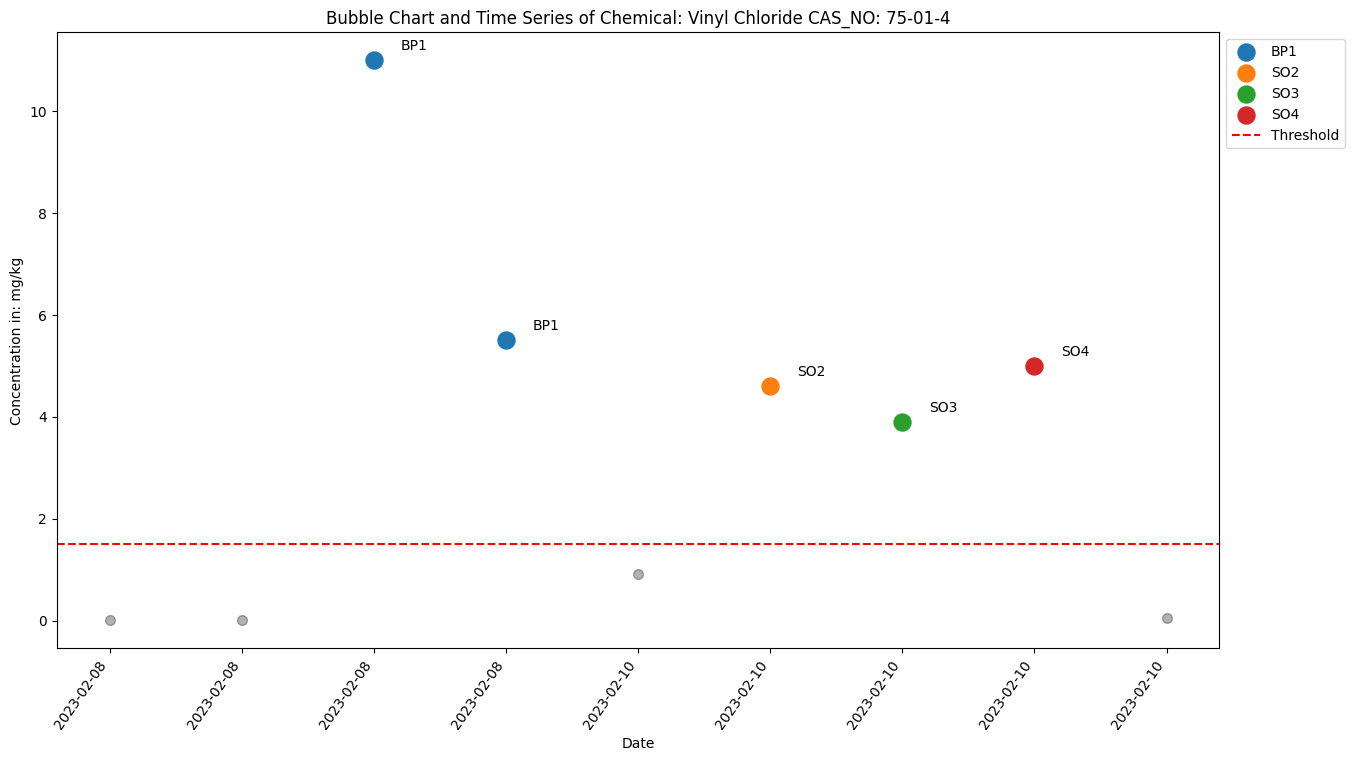

In [44]:
#threshold: https://19january2017snapshot.epa.gov/sites/production/files/2016-09/documents/vinyl-chloride.pdf
plot_chemical(soil_df, '75-01-4', 'Vinyl Chloride', 'mg/kg', 1.5, annot=True)

In [61]:
save_above_threshold(soil_df, '75-01-4', 'Vinyl Chloride', 'mg/kg', 1.5, sample_type='Soil')
save_above_threshold(soil_df, '75-01-4', 'Vinyl Chloride', 'mg/kg', 1.5, sample_type='Sediment')

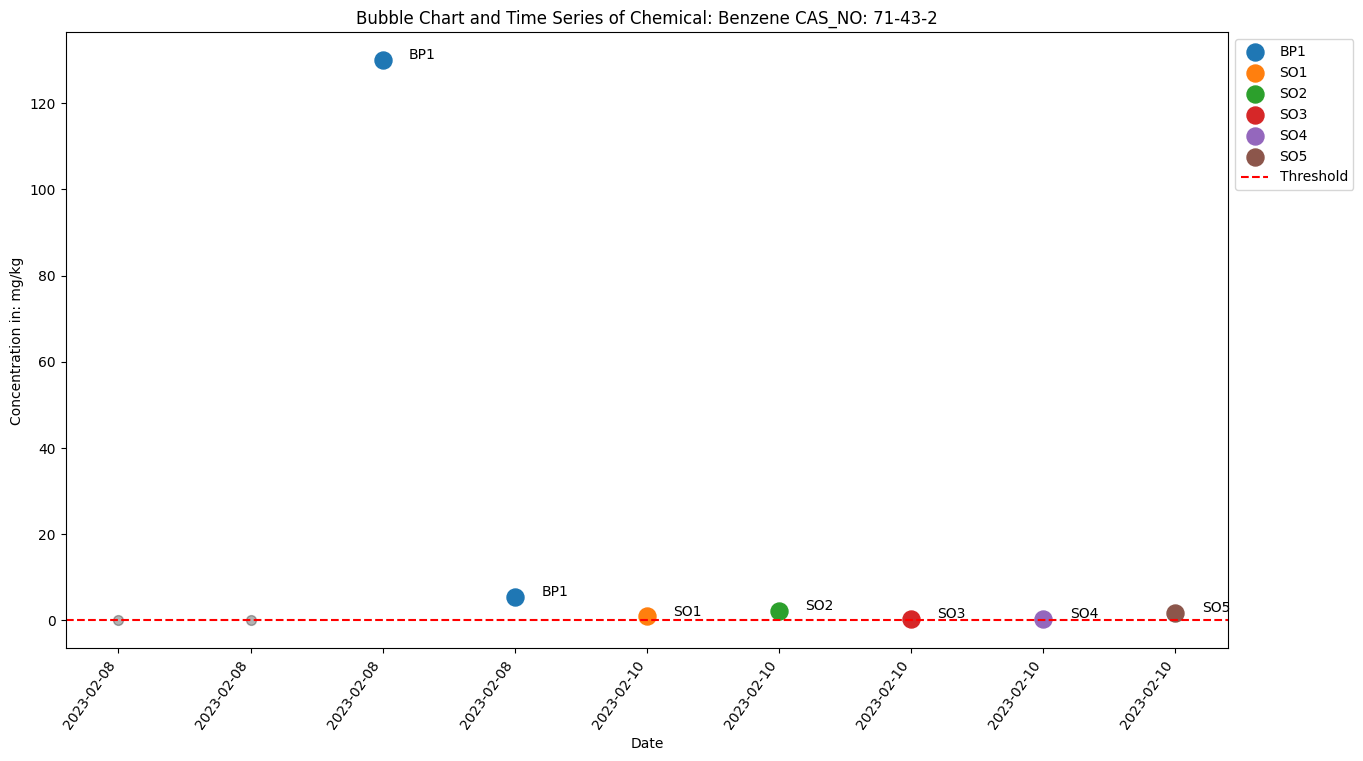

In [46]:
# threshold: https://www.epa.gov/sites/default/files/2016-09/documents/benzene.pdf
plot_chemical(soil_df, '71-43-2', 'Benzene', 'mg/kg', 0.015, annot=True)

In [62]:
save_above_threshold(soil_df, '71-43-2', 'Benzene', 'mg/kg', 0.015, sample_type='Soil')
save_above_threshold(soil_df, '71-43-2', 'Benzene', 'mg/kg', 0.015, sample_type='Sediment')

The EPA's Maximum Contaminant Level (MCL) for benzene in soil is 0.005 mg/kg (5 parts per billion). This limit is set to protect against the potential health effects of benzene exposure, which include leukemia and other cancers.

# Water Plots for Danagerous Chemicals

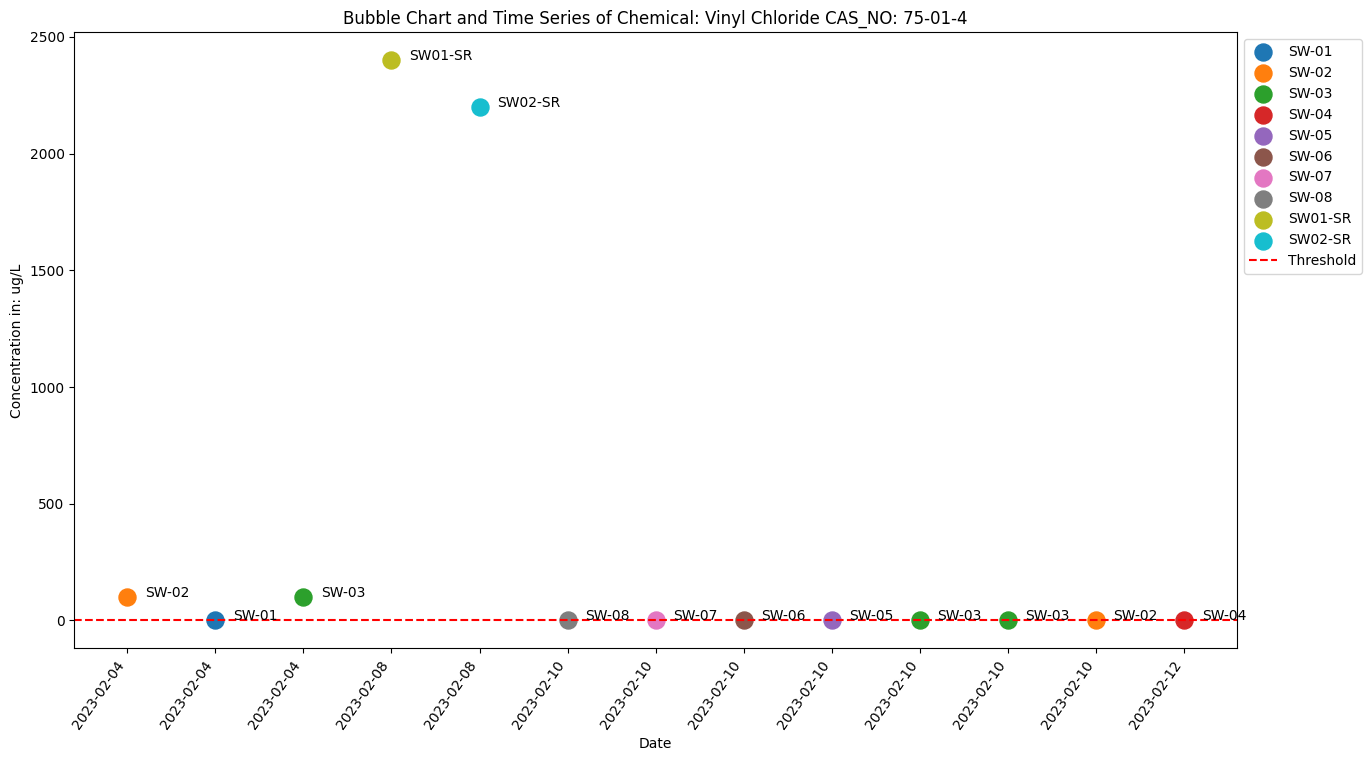

In [47]:
# threshold: https://www.atsdr.cdc.gov/ToxProfiles/tp20-c1-b.pdf
plot_chemical(water_df, '75-01-4', 'Vinyl Chloride', 'ug/L', 0.025, annot=True)

In [63]:
save_above_threshold(water_df, '75-01-4', 'Vinyl Chloride', 'ug/L', 0.025, sample_type='Water')

In [64]:
count_filtered_records(water_df, '75-01-4', 'ug/L', 2)

5


The maximum contaminant level (MCL) for vinyl chloride in drinking water set by the U.S. Environmental Protection Agency (EPA) is 2 ug/L (micrograms per liter) or 2 parts per billion (ppb).

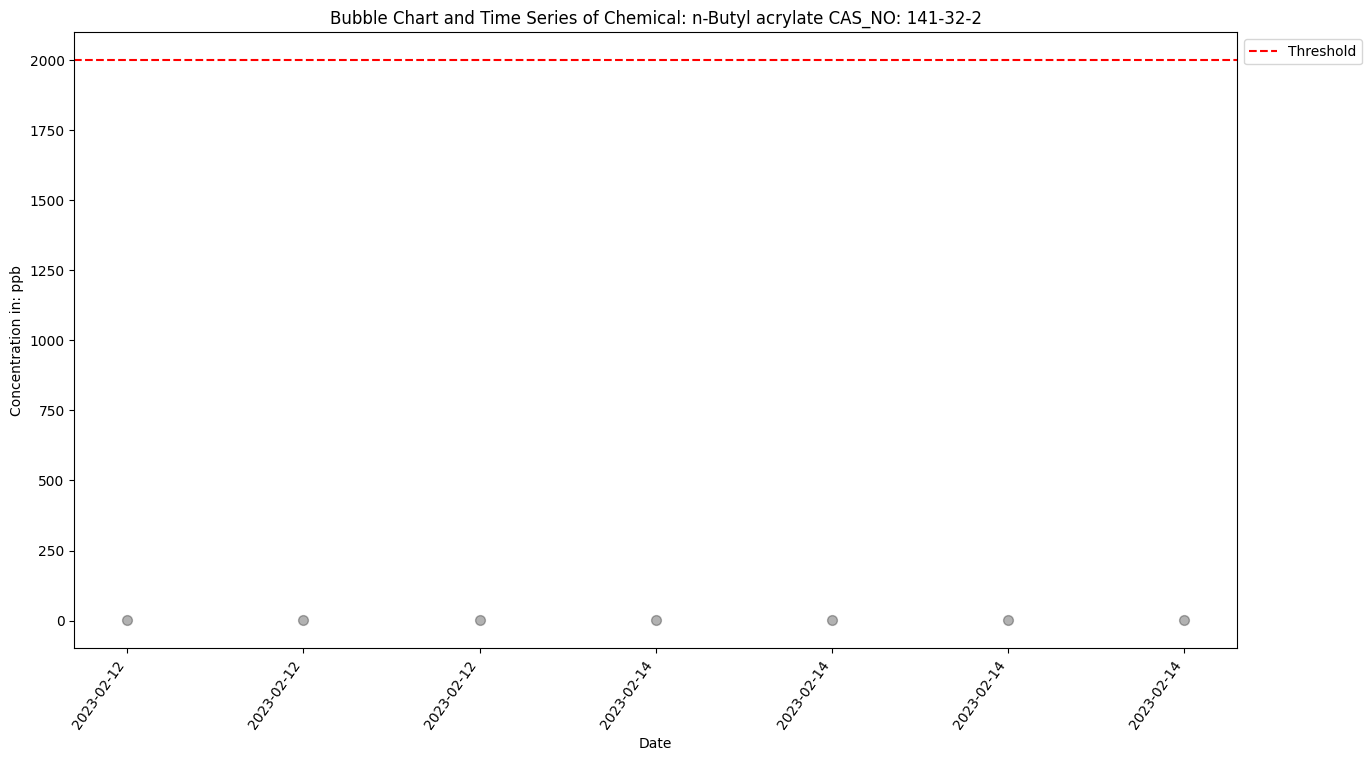

In [50]:
# threshold: https://www.nj.gov/health/eoh/rtkweb/documents/fs/0278.pdf
plot_chemical(water_df, '141-32-2', 'n-Butyl acrylate', 'ppb', 2000, annot=True)

he EPA has established the National Ambient Air Quality Standard (NAAQS) for n-Butyl acrylate at 2 ppb (parts per billion) as an 8-hour average concentration. However, there is no specific safety threshold set for n-Butyl acrylate in soil or water by the EPA.

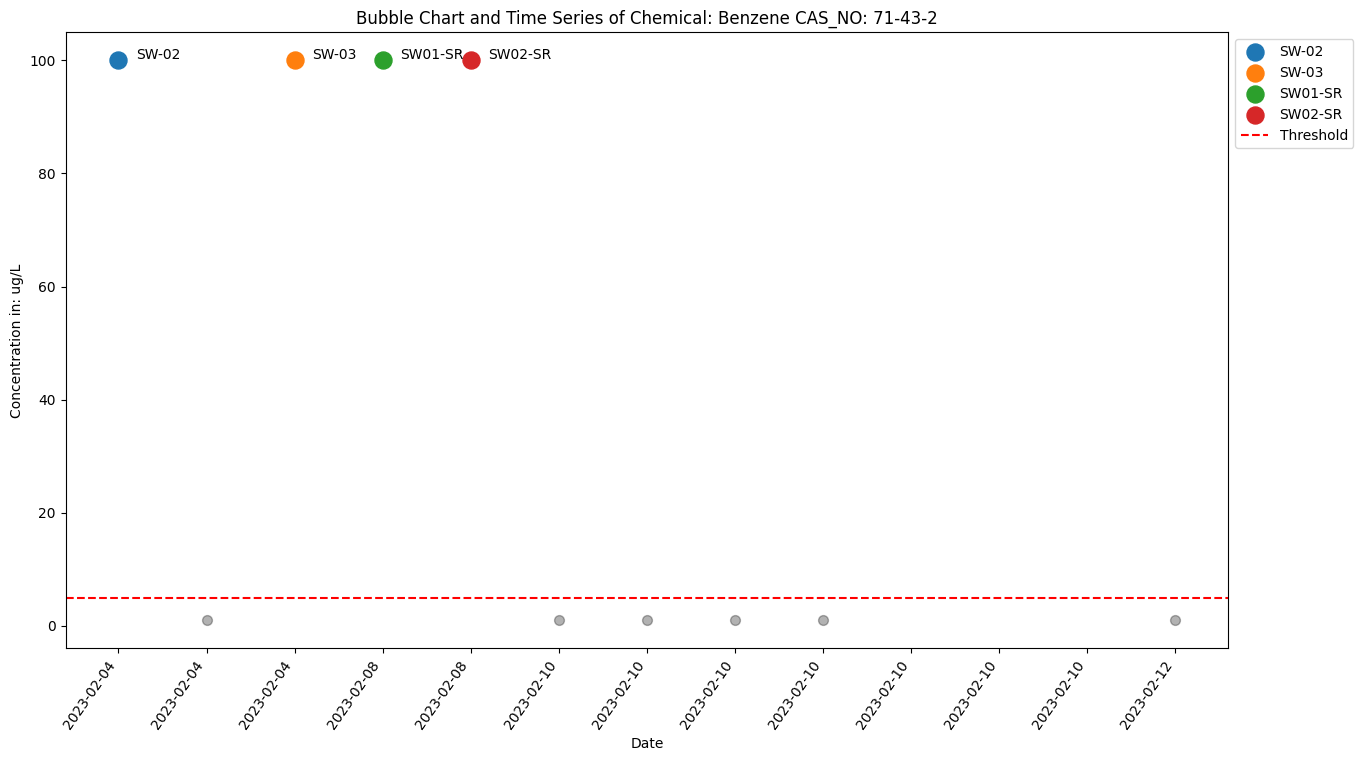

In [51]:
# threshold: https://www.atsdr.cdc.gov/toxprofiles/tp3-c8.pdf
plot_chemical(water_df, '71-43-2', 'Benzene', 'ug/L', 5, annot=True)

In [65]:
save_above_threshold(water_df, '71-43-2', 'Benzene', 'ug/L', 5, sample_type='Water')

The Maximum Contaminant Level (MCL) for benzene in drinking water set by the EPA is 0.005 mg/L, which is equivalent to 5 ug/L.

We only consider the rows that have their result_unit the same as the measurement passed to the function.
For example, here, for Benzene we had one record that had mg/kg as its measurement so we don't consider it.

In [67]:
# read the above threshold chemicals into dataframe
df1 = pd.read_csv('/content/Air_71-43-2_Benzene_above_threshold.csv')
df2 = pd.read_csv('/content/Air_75-01-4_Vinyl Chloride_above_threshold.csv')
df3 = pd.read_csv('/content/Sediment_71-43-2_Benzene_above_threshold.csv')
df4 = pd.read_csv('/content/Sediment_75-01-4_Vinyl Chloride_above_threshold.csv')
df5 = pd.read_csv('/content/Soil_71-43-2_Benzene_above_threshold.csv')
df6 = pd.read_csv('/content/Soil_75-01-4_Vinyl Chloride_above_threshold.csv')
df7 = pd.read_csv('/content/Water_71-43-2_Benzene_above_threshold.csv')
df8 = pd.read_csv('/content/Water_75-01-4_Vinyl Chloride_above_threshold.csv')

In [68]:
df1.head()

,Location,Samp_No,SampleDate_txt,SampleTime,Matrix,SampleMedia,Activity,Analytical_Method,CAS_NO,Analyte,Result_Units,Reporting_Limit,Validation_Level,Result_Final_Txt,Result_Qualifier_Final,RL_Comparison,datetime
0,SA-01,EPD-SA-01-020623,2/6/2023,21:30,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.22,Final,4.2,J-,Yes,2023-02-06 21:30:00
1,ST-02,EPD-MG-01-021223,2/13/2023,11:36,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.10,Final,1.4,NaN,Yes,2023-02-13 11:36:00
2,WA-01,EPD-WA-01-021423,2/14/2023,10:56,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.11,Prelim,2.1,NaN,Yes,2023-02-14 10:56:00
3,WA-01,EPD-WA-01-022023,2/20/2023,7:00,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.11,Prelim,1.9,NaN,Yes,2023-02-20 07:00:00
4,WA-01,EPD-WA-01-022123,2/21/2023,0:33,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.11,Prelim,1.3,NaN,Yes,2023-02-21 00:33:00


In [76]:
# concatenate all the above dataframe in one dataframe named hazardous_chemicals
hazardous_chemicals = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [77]:
hazardous_chemicals.head()

,Location,Samp_No,SampleDate_txt,SampleTime,Matrix,SampleMedia,Activity,Analytical_Method,CAS_NO,Analyte,Result_Units,Reporting_Limit,Validation_Level,Result_Final_Txt,Result_Qualifier_Final,RL_Comparison,datetime
0,SA-01,EPD-SA-01-020623,2/6/2023,21:30,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.22,Final,4.2,J-,Yes,2023-02-06 21:30:00
1,ST-02,EPD-MG-01-021223,2/13/2023,11:36,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.10,Final,1.4,NaN,Yes,2023-02-13 11:36:00
2,WA-01,EPD-WA-01-021423,2/14/2023,10:56,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.11,Prelim,2.1,NaN,Yes,2023-02-14 10:56:00
3,WA-01,EPD-WA-01-022023,2/20/2023,7:00,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.11,Prelim,1.9,NaN,Yes,2023-02-20 07:00:00
4,WA-01,EPD-WA-01-022123,2/21/2023,0:33,Air,Summa Canister,Air,TO-15 SIM,71-43-2,Benzene,ug/m3,0.11,Prelim,1.3,NaN,Yes,2023-02-21 00:33:00


In [82]:
# droping datetime as it was only added for the time series
hazardous_chemicals.drop(['datetime'], axis=1, inplace=True)

In [83]:
hazardous_chemicals.shape

(73, 16)

In [84]:
hazardous_chemicals.to_csv('hazardous_chemicals.csv', index=False)